# -- Imports --

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pydataset import data
from env import get_db_url
from stats_util import chi2_test

In [2]:
# Helper Functions

α = 0.05

def test_1tail_larger(t, p):
    if (p / 2) < α and t > 0:
        print('The null hypothesis is rejected')
    else:
        print('Failed to reject null hypothesis')
        
def test_1tail_smaller(t, p):
    if (p / 2) < α and t < 0:
        print('The null hypothesis is rejected')
    else:
        print('Failed to reject null hypothesis')
        
def test_2tail(p):
    if p < α:
        print('The null hypothesis is rejected')
    else:
        print('Failed to reject null hypothesis')
        
test_correlation = test_2tail
test_independence = test_correlation

# Overview Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

---

### Has the network latency gone up since we switched internet service providers?

Null Hypothesis: There is no difference in network latency between internet service provider A and internet service provider B.

Alternative Hypothesis: On average the network latency for internet service provider B is greater than that of internet service provider A.

True Positive: Testing determines that there is a difference in network latency between ISP A and ISP B which agrees with reality.

True Negative: Testing determines that there is no difference in network latency between ISP A and ISP B which agrees with reality.

Type I Error: Testing determines that there is a difference in network latency between ISP A and ISP B, but in reality there is no difference.

Type II Error: Testing determines that there is no difference in network latency between ISP A and ISP B, but in reality there is a difference.

---

### Is the website redesign any good?

Null Hypothesis: The website redesign does not resolve the issue raised about the old design.

Alternative Hypothesis: The website redesign resolves the issue raised about the old design.

True Positive: Testing determines that the redesign does resolve the issue raised about the old design which agrees with reality.

True Negative: Testing determines that the resdesign does not resolve the issue raised about the old design which agrees with reality.

Type I Error: Testing determines that the redesign does resolve the issue raised about the old design, but in reality it does not.

Type II Error: Testing determines that the resdesign does not resolve the issue raised about the old design, but in reality it does.

---
### Is our television ad driving more sales?

Null Hypothesis: Our television ad is not driving more sales.

Alternative Hypothesis: Our television ad is driving more sales.

True Positive: Testing determines that our television ad is driving more sales which agrees with reality.

True Negative: Testing determines that our television ad is not driving more sales which agrees with reality.

Type I Error: Testing determines that our television ad is driving more sales, but in reality it is not.

Type II Error: Testing determines that our television ad is not driving more sales, but in reality it is.

# T-Test Exercises

### Ace Realty

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

We are comparing two samples so we will use a two sample t-test for comparison.

**Assumptions**

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
- Independent samples
- Equal Variances (or set method argument to False when not)

In [3]:
# Each sample has more than 30 observations so presume normal distributions

sample1_mean = 90
sample1_stddev = 15
sample1_size = 40

sample2_mean = 100
sample2_stddev = 20
sample2_size = 50

In [4]:
# The variances are not equal so we will set the equal_var argument to False, the samples are independent.
sample1_stddev ** 2, sample2_stddev ** 2

(225, 400)

In [5]:
# Since we don't have the datasets we use the ttest_ind_from_stats function

t, p = stats.ttest_ind_from_stats(
    sample1_mean, 
    sample1_stddev, 
    sample1_size, 
    sample2_mean, 
    sample2_stddev, 
    sample2_size, 
    equal_var = False
)

The question asks if there is a difference in the average time to sell homes between the two offices, so we use a 2 tail test.

$H_{0}$: There is no difference between the average time to sell homes at office #1 and the average time to sell homes at office #2.
<br>
$H_{a}$: There is a difference between the average time to sell homes at office #1 and the average time to sell homes at office #2.

In [6]:
test_2tail(p)

The null hypothesis is rejected


**Conclusion**

There is a difference between the average time to sell homes between office #1 and office #2.

---

### MPG

Load the mpg dataset and use it to answer the following questions:

In [7]:
mpg = data('mpg')
mpg.info()
alpha = 0.05

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


---
### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Here we will be comparing two different samples so we will use a two sample t-test for comparison.

**Assumptions**

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
- Independent samples
- Equal Variances (or set method argument to False when not)

In [8]:
# Here we create a average mpg column in order to make comparing the fuel efficiency of each car easier.

mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


**Verify Assumptions**

In [9]:
# Each sample has more than 30 observations, and they are independent samples

mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [10]:
# Now we assign our samples to variables

sample_1999 = mpg[mpg.year == 1999].avg_mpg
sample_2008 = mpg[mpg.year == 2008].avg_mpg

In [11]:
# Using the Levene test to determine equal variance
# H0: There is no difference in variance for sample_1999 and sample_2008.

stats.levene(sample_1999, sample_2008)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

The p value is not less than alpha so we will use equal_var = True.

In [12]:
# Calculate the t statistic and p value
t, p = stats.ttest_ind(sample_1999, sample_2008, equal_var = True)

The question asks if there is a difference in fuel efficiency between the two samples so we will use a 2 tail test.

$H_{0}$: There is no difference between the average mpg for 1999 cars and the average mpg for 2008 cars.
<br>
$H_{a}$: There is a difference the average mpg for 1999 cars and the average mpg for 2008 cars.

In [13]:
test_2tail(p)

Failed to reject null hypothesis


**Conclusion**

There is no difference in fuel-efficiency in cars from 2008 vs 1999?

---
### Are compact cars more fuel-efficient than the average car?

Here we will be comparing one sample to the overall so we will use a one sample t-test.

**Assumptions**

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)

In [14]:
# Here we assign our sample to a variable

compact_cars = mpg[mpg['class'] == 'compact'].avg_mpg

**Verify Asssumptions**

In [15]:
# We have more than 30 observations

compact_cars.size

47

In [16]:
# Calculate the overall mean, t statistic and p value
overall_mean = mpg.avg_mpg.mean()

alpha = 0.05
t, p = stats.ttest_1samp(compact_cars, overall_mean)

The question asks if compact cars are more fuel efficient than the average car so we use a 1 tail test.

$H_{0}$: There is no difference between the average mpg for compact cars and the overall average mpg.
<br>
$H_{a}$: The average mpg for compact cars is significantly larger than the overall average mpg.

In [17]:
test_1tail_larger(t, p)

The null hypothesis is rejected


**Conclusion**

The fuel efficiency for compact cars is significantly larger than the overall fuel efficiency for all cars.

---
### Do manual cars get better gas mileage than automatic cars?

Here we will be comparing two different samples so we will use a two sample t-test for comparison.

**Assumptions**

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
- Independent samples
- Equal Variances (or set method argument to False when not

In [18]:
# Assign the sample sets to variables

manual_cars = mpg[mpg.trans.str.contains('manual')].avg_mpg
automatic_cars = mpg[mpg.trans.str.contains('auto')].avg_mpg

**Verify Assumptions**

In [19]:
# Each sample has more than 30 observations, and they are independent samples

manual_cars.size, automatic_cars.size

(77, 157)

In [20]:
# Using the Levene test to determine equal variance
# H0: There is no difference in variance for manual_cars and automatic_cars.

stats.levene(manual_cars, automatic_cars)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

The p value is not less than alpha so we will use equal_var = True.

In [21]:
t, p = stats.ttest_ind(manual_cars, automatic_cars, equal_var = True)

The question asks if manual cars get better gas mileage than automatic cars so we will use a 1 tail test.

$H_{0}$: There is no difference between the average mpg for manual cars and the average mpg for automatic cars
<br>
$H_{a}$: The average mpg for manual cars is significantly larger than the average mpg for automatic cars

In [22]:
test_1tail_larger(t, p)

The null hypothesis is rejected


**Conclusion**

The fuel efficiency of manual cars is significantly larger than the fuel efficiency of automatic cars.

---

# Correlation Exercises

## 1

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [23]:
# We will download the telco_churn data from mysql

customers = pd.read_csv('telco_churn.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   int64  
 6   internet_service        7049 non-null   int64  
 7   contract_type           7049 non-null   int64  
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  tenure                  7049 non-null   int64  
 12  churn                   7049 non-null   object 
 13  has_phone               7049 non-null   bool   
 14  has_internet            7049 non-null   

### Does tenure correlate with monthly charges?

$H_{0}$: There is no linear correlation between tenure and monthly charges.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges.

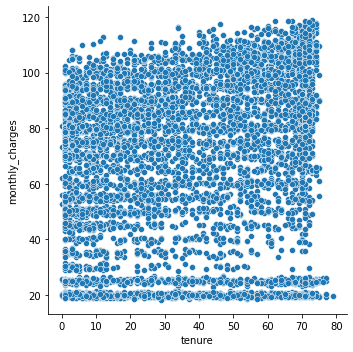

In [24]:
sns.relplot(data = customers, x = 'tenure', y = 'monthly_charges');

In [25]:
r, p = stats.pearsonr(customers.tenure, customers.monthly_charges)
r, p

(0.24730589929516256, 1.0229574716035533e-98)

In [26]:
test_correlation(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no linear correlation between tenure and monthly charges, but the correlation is very weak.

### Does tenure correlate with total charges?

$H_{0}$: There is no linear correlation between tenure and total charges.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges.

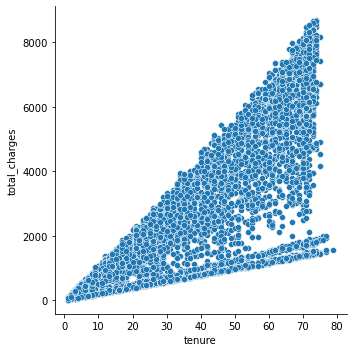

In [27]:
sns.relplot(data = customers, x = 'tenure', y = 'total_charges');

In [28]:
# We must first fill in null values in the total_charges column
customers.total_charges.fillna(0, inplace = True)

In [29]:
r, p = stats.pearsonr(customers.tenure, customers.total_charges)
r, p

(0.8262111781262839, 0.0)

In [30]:
test_correlation(p)

The null hypothesis is rejected


**Conclusion**

The null hypothesis that there is no linear correlation between tenure and total charges is rejected.

### Does tenure correlate with monthly charges when we control for phone and internet service?

$H_{0}$: There is no linear correlation between tenure and monthly charges for customers with phone service.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges for customers with phone service.

In [31]:
# For customers with phone service
customers_with_phone = customers.has_phone == True

r, p = stats.pearsonr(customers[customers_with_phone].tenure, customers[customers_with_phone].monthly_charges)
r, p

(0.24455977423045666, 2.4182091948008445e-87)

In [32]:
test_correlation(p)

The null hypothesis is rejected


$H_{0}$: There is no linear correlation between tenure and monthly charges for customers without phone service.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges for customers without phone service.

In [33]:
# For customers without phone service
customers_without_phone = customers.has_phone == False

r, p = stats.pearsonr(customers[customers_without_phone].tenure, customers[customers_without_phone].monthly_charges)
r, p

(0.5861906225337362, 2.8673445150784685e-64)

In [34]:
test_correlation(p)

The null hypothesis is rejected


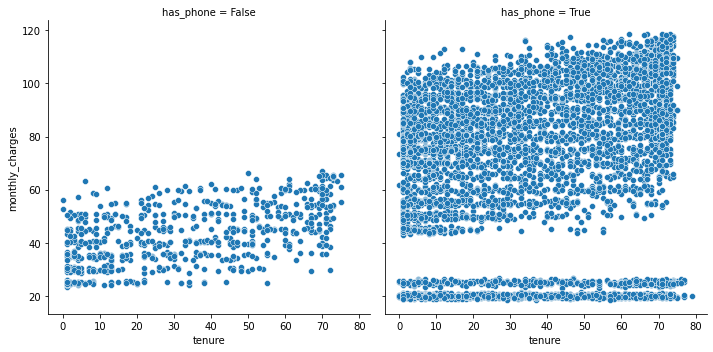

In [35]:
sns.relplot(data = customers, x = 'tenure', y = 'monthly_charges', col = 'has_phone');

$H_{0}$: There is no linear correlation between tenure and monthly charges for customers with internet service.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges for customers with internet service.

In [36]:
# For customers with internet service
customer_with_internet = customers.has_internet == True

r, p = stats.pearsonr(customers[customer_with_internet].tenure, customers[customer_with_internet].monthly_charges)
r, p

(0.37295493297885834, 9.996220302259692e-182)

In [37]:
test_correlation(p)

The null hypothesis is rejected


$H_{0}$: There is no linear correlation between tenure and monthly charges for customers without internet service.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges for customers without internet service.

In [38]:
# For customers with internet service
customer_without_internet = customers.has_internet == False

r, p = stats.pearsonr(customers[customer_without_internet].tenure, customers[customer_without_internet].monthly_charges)
r, p

(0.34239111178538745, 2.674863586787635e-43)

In [39]:
test_correlation(p)

The null hypothesis is rejected


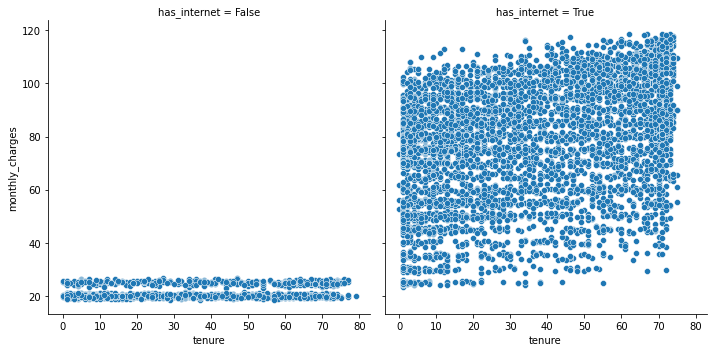

In [40]:
sns.relplot(data = customers, x = 'tenure', y = 'monthly_charges', col = 'has_internet');

$H_{0}$: There is no linear correlation between tenure and monthly charges for customers with both phone and internet.
<br>
$H_{a}$: There is a linear correlation between tenure and monthly charges for customers with both phone and internet.

In [41]:
customer_with_phone_and_internet = customers.has_phone_and_internet == True

r, p = stats.pearsonr(customers[customer_with_phone_and_internet].tenure, customers[customer_with_phone_and_internet].monthly_charges)
r, p

(0.4437255353762448, 1.5951813825621583e-232)

In [42]:
test_correlation(p)

The null hypothesis is rejected


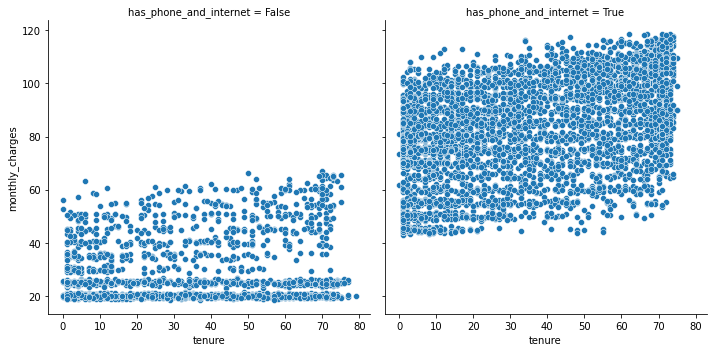

In [43]:
sns.relplot(data = customers, x = 'tenure', y = 'monthly_charges', col = 'has_phone_and_internet');

**Conclusion**

In all cases when we control for phone and internet service we reject the null hypothesis that there is no linear correaltion between tenure and monthly charges.

### What about total charges when we control for phone and internet service?

$H_{0}$: There is no linear correlation between tenure and total charges for customers with phone service.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges for customers with phone service.

In [44]:
r, p = stats.pearsonr(customers[customers_with_phone].tenure, customers[customers_with_phone].total_charges)
r, p

(0.8301133309948354, 0.0)

In [45]:
test_correlation(p)

The null hypothesis is rejected


$H_{0}$: There is no linear correlation between tenure and total charges for customers without phone service.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges for customers without phone service.

In [46]:
r, p = stats.pearsonr(customers[customers_without_phone].tenure, customers[customers_without_phone].total_charges)
r, p

(0.9543558863259287, 0.0)

In [47]:
test_correlation(p)

The null hypothesis is rejected


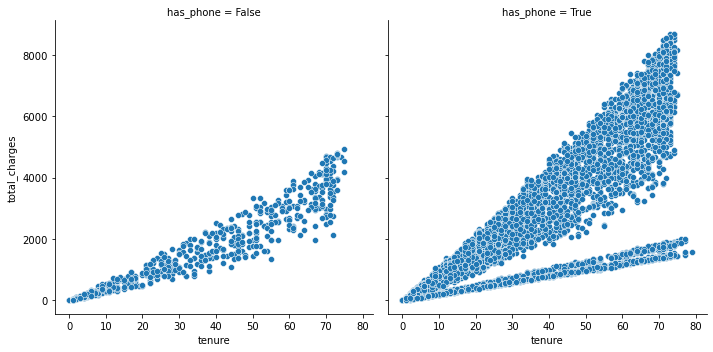

In [48]:
sns.relplot(data = customers, x = 'tenure', y = 'total_charges', col = 'has_phone');

$H_{0}$: There is no linear correlation between tenure and total charges for customers with internet service.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges for customers with internet service.

In [49]:
r, p = stats.pearsonr(customers[customer_with_internet].tenure, customers[customer_with_internet].total_charges)
r, p

(0.9327443769611806, 0.0)

In [50]:
test_correlation(p)

The null hypothesis is rejected


$H_{0}$: There is no linear correlation between tenure and total charges for customers without internet service.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges for customers without internet service.

In [51]:
r, p = stats.pearsonr(customers[customer_without_internet].tenure, customers[customer_without_internet].total_charges)
r, p

(0.9843043981005267, 0.0)

In [52]:
test_correlation(p)

The null hypothesis is rejected


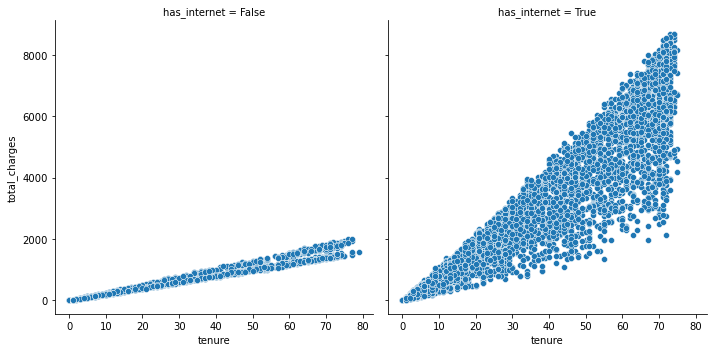

In [53]:
sns.relplot(data = customers, x = 'tenure', y = 'total_charges', col = 'has_internet');

$H_{0}$: There is no linear correlation between tenure and total charges for customers with both phone and internet.
<br>
$H_{a}$: There is a linear correlation between tenure and total charges for customers with both phone and internet.

In [54]:
r, p = stats.pearsonr(customers[customer_with_phone_and_internet].tenure, customers[customer_with_phone_and_internet].total_charges)
r, p

(0.9588553573399495, 0.0)

In [55]:
test_correlation(p)

The null hypothesis is rejected


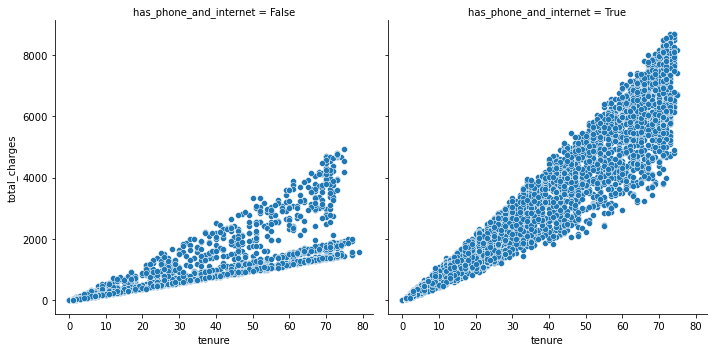

In [56]:
sns.relplot(data = customers, x = 'tenure', y = 'total_charges', col = 'has_phone_and_internet');

**Conclusion**

In all cases where we control for phone and internet service we reject the null hypothesis that there is no linear correlation between tenure and total charges.

## 2

Use the employees database.

### Is there a relationship between how long an employee has been with the company and their salary?

In [82]:
# Using DATEDIFF with MAX(hire_date) and hire_date would avoid artificially adding extra years to the days_with_company column

# Here we are only looking at current employees and their current salaries
sql = '''
SELECT
    employees.emp_no,
    salaries.salary,
    DATEDIFF(NOW(), employees.hire_date) AS days_with_company
FROM employees
JOIN salaries USING (emp_no)
WHERE salaries.to_date > NOW();
'''

salaries = pd.read_sql(sql, get_db_url('employees'))
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   emp_no             240124 non-null  int64
 1   salary             240124 non-null  int64
 2   days_with_company  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


$H_{0}$: There is no linear correlation between salary and how long an employee has been with the company.
<br>
$H_{a}$: There is a linear correlation between salary and how long an employee has been with the company.

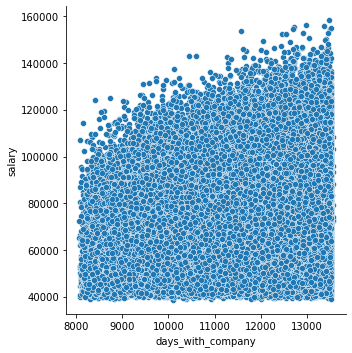

In [58]:
sns.relplot(data = salaries, y = 'salary', x = 'days_with_company');

In [59]:
r, p = stats.pearsonr(salaries.salary, salaries.days_with_company)
r, p

(0.30646256131860894, 0.0)

In [60]:
test_correlation(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no linear correlation between salary and how long an employee has been with the company; however, the correlation is not very strong.

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [61]:
# Here we are only looking at current employees and their current salaries
sql = '''
SELECT
    employees.emp_no,
    titles_count.num_titles,
    DATEDIFF(NOW(), employees.hire_date) AS days_with_company
FROM employees
JOIN titles USING (emp_no)
JOIN (
    SELECT
        emp_no,
        COUNT(title) AS num_titles
    FROM titles
    GROUP BY emp_no
) AS titles_count USING (emp_no)
WHERE titles.to_date > NOW();
'''

titles = pd.read_sql(sql, get_db_url('employees'))
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   emp_no             240124 non-null  int64
 1   num_titles         240124 non-null  int64
 2   days_with_company  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


$H_{0}$: There is linear no correlation between the number of titles an employee has had and how long an employee has been with the company.
<br>
$H_{a}$: There is a linear correlation between the number of titles an employee has had and how long an employee has been with the company.

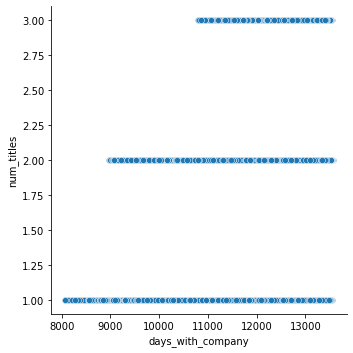

In [62]:
sns.relplot(data = titles, x = 'days_with_company', y = 'num_titles');

In [63]:
r, p = stats.pearsonr(titles.num_titles, titles.days_with_company)
r, p

(0.2871267889699541, 0.0)

In [64]:
test_correlation(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no correlation between the number of titles an employee has had and how long an employee has been with the company; however, the correlation is weak.

## 3

Use the sleepstudy data.

### Is there a relationship between days and reaction time?

In [65]:
sleepstudy = data('sleepstudy')
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


$H_{0}$: There is no linear correlation between days and reaction time.
<br>
$H_{a}$: There is a linear correlation between days and reaction time.

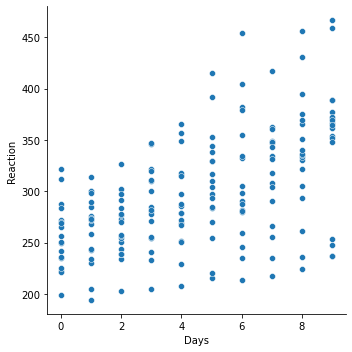

In [83]:
sns.relplot(data = sleepstudy, x = 'Days', y = 'Reaction');

In [67]:
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [68]:
test_correlation(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no linear correlation between days a reaction time.

# Chi Square Exercises

## 1

### Are using a macbook and being a codeup student independent of each other.

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [69]:
'''
                        Codeup Student        Not a Codeup Student
Uses a Macbook                49                       20
Doesn't Use a Macbook          1                       30
''';

In [91]:
indices = ['uses_a_macbook', 'doesnt_use_a_macbook']
columns = ['codeup_student', 'not_a_codeup_student']

macbooks = pd.DataFrame([[49, 20], [1, 30]], index = indices, columns = columns)
macbooks

,codeup_student,not_a_codeup_student
uses_a_macbook,49,20
doesnt_use_a_macbook,1,30


$H_0$: There is no association between using a macbook and being a codeup student. (They are independent)
<br>
$H_a$: There is an association between using a macbook and being a codeup student. (They are dependent)

In [92]:
χ2, p, degf, expected = stats.chi2_contingency(macbooks)
χ2, p

(36.65264142122487, 1.4116760526193828e-09)

In [93]:
test_independence(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no association between using a macbook and being a codeup student. This assertion agrees with a visual analysis of the data.

## 2

Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

### Are vehicle transmission and class independent?

We will perform chi2 test on columns class and trans.

In [73]:
observed = pd.crosstab(mpg['class'], mpg.trans)
observed

trans,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
class,,,,,,,,,,
2seater,0,0,1,0,0,0,0,1,0,3
compact,2,1,8,4,0,2,2,5,18,5
midsize,3,0,14,5,0,1,0,6,9,3
minivan,0,1,8,0,2,0,0,0,0,0
pickup,0,0,12,8,0,0,0,0,8,5
subcompact,0,0,11,4,0,0,0,1,16,3
suv,0,0,29,18,4,0,1,3,7,0


$H_0$: There is no association between vehicle class and transmission. (They are independent)
<br>
$H_a$: There is an association between vehicle class and transmission. (They are dependent)

In [89]:
χ2, p, degf, expected = stats.chi2_contingency(observed)
χ2, p

(126.38654482049155, 9.774228558920578e-08)

In [90]:
test_independence(p)

The null hypothesis is rejected


**Conclusion**

We reject the null hypothesis that there is no association between vehicle class and transmission. From visual analysis of the data there does seem to be a weak relationship between transmission and class.

## 3

Use the data from the employees database to answer these questions:

### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [78]:
sql = '''
SELECT
    emp_no,
    gender,
    dept_name
FROM employees
JOIN dept_emp USING (emp_no)
JOIN departments USING (dept_no)
WHERE dept_name IN ('Sales', 'Marketing')
    AND to_date > NOW();
'''

employees_in_sales_and_marketing = pd.read_sql(sql, get_db_url('employees'))
employees_in_sales_and_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emp_no     52543 non-null  int64 
 1   gender     52543 non-null  object
 2   dept_name  52543 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [95]:
observed = pd.crosstab(employees_in_sales_and_marketing.gender, employees_in_sales_and_marketing.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


$H_0$: There is no association between an employee's gender and whether they work in sales or marketing. (They are independent)
<br>
$H_a$: There is an association between an employee's gender and whether they work in sales or marketing. (They are dependent)

In [108]:
χ2, p, degf, expected = stats.chi2_contingency(observed)
χ2, p

(1.4566857643547197, 0.22745818732810363)

In [97]:
test_independence(p)

Failed to reject null hypothesis


**Conclusion**

We fail to reject the hypothesis that there is no association between an employee's gender and whether they work in sales or marketing. This agrees with visual analysis of the data.

### Is an employee's gender independent of whether or not they are or have been a manager?

In [103]:
sql = '''
SELECT
    emp_no,
    gender,
    IF(dept_no IS NOT NULL, 'True', 'False') AS has_been_or_is_manager
FROM employees
LEFT JOIN dept_manager USING (emp_no);
'''

employees = pd.read_sql(sql, get_db_url('employees'))
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   emp_no                  300024 non-null  int64 
 1   gender                  300024 non-null  object
 2   has_been_or_is_manager  300024 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


$H_0$: There is no association between gender and whether or not an employee is or has been a manager. (They are independent)
<br>
$H_a$: There is an association between gender and whether or not an employee is or has been a manager. (They are dependent)

In [104]:
observed = pd.crosstab(employees.gender, employees.has_been_or_is_manager)
observed

has_been_or_is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [106]:
χ2, p, degf, expected = stats.chi2_contingency(observed)
χ2, p

(1.4566857643547197, 0.22745818732810363)

In [107]:
test_independence(p)

Failed to reject null hypothesis


**Conclusion**

We fail to reject the hypothesis that there is no association between gender and whether or not an employee is or has been a manager. This agrees with visual analysis of the data.